In [54]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from interface import GraphDTA

sns.set_theme(style='darkgrid')

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else "cpu")

In [3]:
drugs = {
    'abt737':'CN(C)CCC(CSC1=CC=CC=C1)NC2=C(C=C(C=C2)S(=O)(=O)NC(=O)C3=CC=C(C=C3)N4CCN(CC4)CC5=CC=CC=C5C6=CC=C(C=C6)Cl)[N+](=O)[O-]',
    'navitoclax':'CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(=O)(=O)C4=CC(=C(C=C4)NC(CCN5CCOCC5)CSC6=CC=CC=C6)S(=O)(=O)C(F)(F)F)C7=CC=C(C=C7)Cl)C',
}

targets = {
    'bcl2':'MAHAGRTGYDNREIVMKYIHYKLSQRGYEWDAGDVGAAPPGAAPAPGIFSSQPGHTPHPAASRDPVARTSPLQTPAAPGAAAGPALSPVPPVVHLTLRQAGDDFSRRYRRDFAEMSSQLHLTPFTARGRFATVVEELFRDGVNWGRIVAFFEFGGVMCVESVNREMSPLVDNIALWMTEYLNRHLHTWIQDNGGWDAFVELYGPSMRPLFDFSWLSLKTLLSLALVGACITLGAYLGHK',
    'bclxl':'MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEMETPSAINGNPSWHLADSPAVNGATGHSSSLDAREVIPMAAVKQALREAGDEFELRYRRAFSDLTSQLHITPGTAYQSFEQVVNELFRDGVNWGRIVAFFSFGGALCVESVDKEMQVLVSRIAAWMATYLNDHLEPWIQENGGWDTFVELYGNNAAAESRKGQERFNRWFLTGMTVAGVVLLGSLFSRK',
    'bclw':'MATPASAPDTRALVADFVGYKLRQKGYVCGAGPGEGPAADPLHQAMRAAGDEFETRFRRTFSDLAAQLHVTPGSAQQRFTQVSDELFQGGPNWGRLVAFFVFGAALCAESVNKEMEPLVGQVQEWMVAYLETQLADWIHSSGGWAEFTALYGDGALEEARRLREGNWASVRTVLTGAVALGALVTVGAFFASK',
}

In [4]:
pairs = []
xd = []
xt = []

for kd, vd in drugs.items():
    for kt, vt in targets.items():
        pairs.append((kd,kt))
        xd.append(vd)
        xt.append(vt)

In [31]:
modeltypes = ['GINConvNet', 'GATNet', 'GAT_GCN', 'GCNNet']
randomseeds = ['2023', '2024', '2025', '2026', '2027']

models = []
for modeltype in modeltypes:
    for seed in randomseeds:
        m = GraphDTA(modeltype, device=device).load(os.path.join('ckpt', f'{modeltype}_tdc_{seed}_best.pt'))
        models.append((modeltype, m))

In [34]:
records = []

for modeltype, model in models:
    outs = model.evaluate(xd, xt)

    r = [modeltype,] + outs.tolist()

    records.append(r)

In [35]:
df_res = pd.DataFrame.from_records(records, columns=['ModelType',]+[f'{p[0]}_{p[1]}' for p in pairs])

In [36]:
df_res.groupby('ModelType').mean()

,abt737_bcl2,abt737_bclxl,abt737_bclw,navitoclax_bcl2,navitoclax_bclxl,navitoclax_bclw
ModelType,,,,,,
GATNet,7.791336,8.414386,5.859629,6.688692,7.488043,6.223515
GAT_GCN,7.667056,8.041469,6.778139,7.521657,7.968227,6.530141
GCNNet,7.304649,7.998392,6.685456,7.293511,7.908171,6.720739
GINConvNet,8.055495,8.643389,6.701016,7.686057,8.087915,6.603288


In [37]:
df_res

,ModelType,abt737_bcl2,abt737_bclxl,abt737_bclw,navitoclax_bcl2,navitoclax_bclxl,navitoclax_bclw
0,GINConvNet,8.307979,8.677275,6.321006,7.932196,7.281642,6.207840
1,GINConvNet,8.460131,8.531525,6.264894,7.443330,7.954439,5.948073
2,GINConvNet,8.618823,9.571507,7.732996,8.739574,10.310666,7.715845
3,GINConvNet,7.310011,8.246588,6.648356,7.454963,8.659753,7.034732
4,GINConvNet,7.580534,8.190053,6.537826,6.860223,6.233074,6.109948
5,GATNet,8.567633,9.212733,5.712541,7.002806,7.293577,5.649840
6,GATNet,5.462224,5.606575,5.390964,6.075047,6.301323,5.634247
7,GATNet,8.568782,9.482603,6.097539,7.264959,8.209233,6.740193
8,GATNet,8.060618,8.276676,5.207540,6.728675,7.843298,5.828228
9,GATNet,8.297422,9.493341,6.889560,6.371971,7.792786,7.265065


In [68]:
frames = []
epoch = np.linspace(0,1000,100)
colnames = ['RMSE', 'MSE', 'PEARSON', 'SPEARMAN', 'CI']

for modeltype in modeltypes:

    data = {'EPOCH':epoch.astype(int)}
    for col in colnames:
        data[col] = np.zeros_like(epoch)
    
    for seed in randomseeds:
        df = pd.read_csv(os.path.join('ckpt', f'{modeltype}_tdc_{seed}_best_history.csv'))
        for col in colnames:
            data[col] += np.interp(epoch, df.loc[:,'EPOCH'], df.loc[:,col])
            
    for col in colnames:
        data[col] /= len(randomseeds)

    df = pd.DataFrame(data)
    df.loc[:,'ModelType'] = modeltype
    
    frames.append(df)

In [75]:
df_hist = pd.concat(frames)

In [76]:
df_hist

,EPOCH,RMSE,MSE,PEARSON,SPEARMAN,CI,ModelType
0,0,1.409855,1.998819,0.390226,0.395118,0.660917,GINConvNet
1,10,1.063378,1.133489,0.651448,0.586500,0.747183,GINConvNet
2,20,1.038414,1.079787,0.667813,0.597253,0.753412,GINConvNet
3,30,1.038451,1.080530,0.666731,0.602453,0.757243,GINConvNet
4,40,1.020020,1.042733,0.681255,0.619564,0.765474,GINConvNet
...,...,...,...,...,...,...,...
95,959,1.115201,1.255111,0.640510,0.579972,0.749562,GCNNet
96,969,1.115249,1.255203,0.640526,0.579968,0.749566,GCNNet
97,979,1.115298,1.255295,0.640542,0.579964,0.749570,GCNNet
98,989,1.115346,1.255388,0.640559,0.579959,0.749574,GCNNet


In [78]:
def make_lineplot(df, label, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(10,5))

    sns.lineplot(data=df, x='EPOCH', y=label, hue='ModelType', ax=ax)

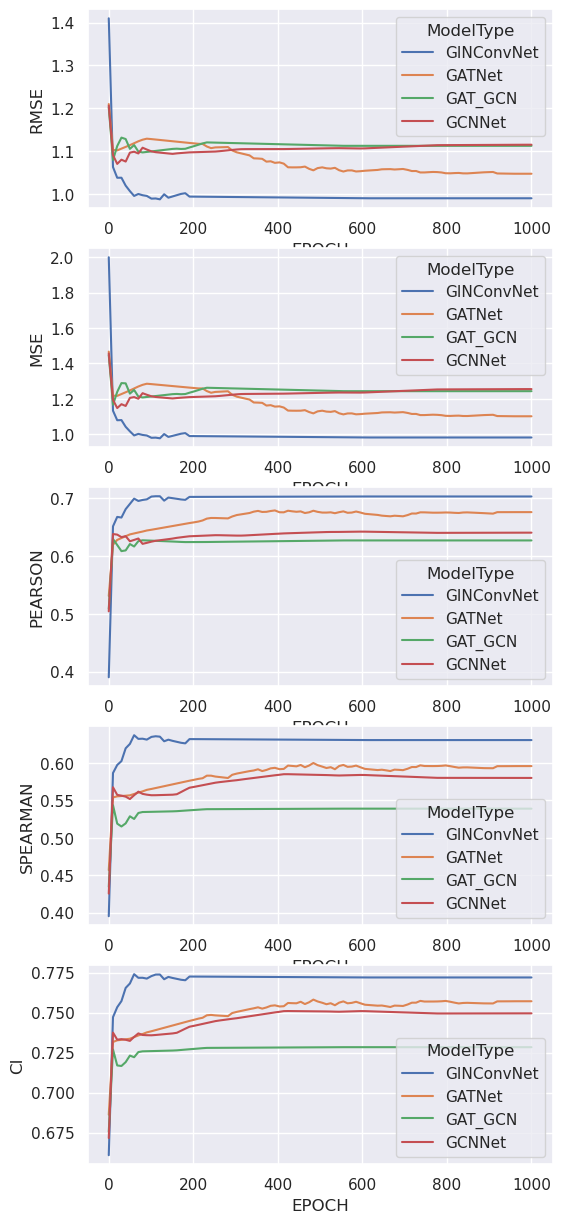

In [81]:
fig, ax = plt.subplots(5, 1, figsize=(6,15))

make_lineplot(df_hist, 'RMSE', ax=ax[0])
make_lineplot(df_hist, 'MSE', ax=ax[1])
make_lineplot(df_hist, 'PEARSON', ax=ax[2])
make_lineplot(df_hist, 'SPEARMAN', ax=ax[3])
make_lineplot(df_hist, 'CI', ax=ax[4])